In [1]:
from os import listdir
from numpy import asarray,load
from numpy import vstack
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import img_to_array,load_img

In [2]:
def load_images(paths,size=(256,512)):
  src_list,tar_list=list(),list()

  for path in listdir(paths):
    pixels=load_img(paths+path,target_size=size)

    pixels=img_to_array(pixels)

    sat_img,map_img=pixels[:,:256],pixels[:,256:]
    src_list.append(sat_img)
    tar_list.append(map_img)

  return [asarray(src_list),asarray(tar_list)]

In [3]:
path='/content/maps/train/'
[src_images,tar_images]=load_images(path)
print(src_images.shape,tar_images.shape)

(1096, 256, 256, 3) (1096, 256, 256, 3)


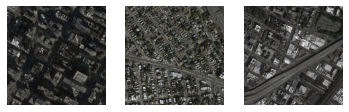

In [4]:
n_samples=3

for i in range(n_samples):
  plt.subplot(2,n_samples,1+i)
  plt.axis('off')
  plt.imshow(src_images[i].astype('uint8'))

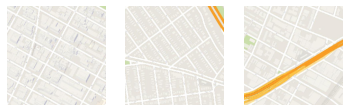

In [5]:
for i in range(n_samples):
  plt.subplot(2,n_samples,1+i)
  plt.axis('off')
  plt.imshow(tar_images[i].astype('uint8'))

In [6]:
!pip install import_ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.0 MB/s eta 0:00:00


In [7]:
import import_ipynb

In [9]:
import pix2pix

importing Jupyter notebook from pix2pix.ipynb


/usr/local/lib/python3.8/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
from pix2pix import define_discriminator, define_generator, define_gan, train

In [11]:
image_shape=src_images.shape[1:]

In [12]:
d_model=define_discriminator(image_shape)
g_model=define_generator(image_shape)
gan_model=define_gan(g_model,d_model,image_shape)

In [13]:
data = [src_images, tar_images]

def preprocess_data(data):
  X1, X2 = data[0], data[1]
  
  X1 = (X1 - 127.5) / 127.5
  X2 = (X2 - 127.5) / 127.5
  
  return [X1, X2]

dataset = preprocess_data(data)

In [14]:
train(d_model, g_model, gan_model, dataset, n_epochs=2, n_batch=1) 

1/1 [==============================] - 9s 9s/step
>1, d1[0.365] d2[0.709] g[89.791]
1/1 [==============================] - 0s 21ms/step
>2, d1[0.295] d2[0.601] g[74.499]
1/1 [==============================] - 0s 21ms/step
>3, d1[0.295] d2[0.506] g[85.954]
1/1 [==============================] - 0s 24ms/step
>4, d1[0.475] d2[0.484] g[63.781]
1/1 [==============================] - 0s 22ms/step
>5, d1[0.541] d2[0.508] g[53.954]
1/1 [==============================] - 0s 22ms/step
>6, d1[0.453] d2[0.481] g[64.260]
1/1 [==============================] - 0s 23ms/step
>7, d1[0.584] d2[0.502] g[70.127]
1/1 [==============================] - 0s 20ms/step
>8, d1[0.322] d2[0.426] g[71.305]
1/1 [==============================] - 0s 22ms/step
>9, d1[0.268] d2[0.361] g[70.955]
1/1 [==============================] - 0s 24ms/step
>10, d1[0.251] d2[0.336] g[63.544]
1/1 [==============================] - 0s 21ms/step
>11, d1[0.267] d2[0.315] g[66.203]
1/1 [==============================] - 0s 22ms/step
>1

>Saved: plot_001096.png and model_001096.h5
1/1 [==============================] - 0s 24ms/step
>1097, d1[0.539] d2[0.932] g[12.660]
1/1 [==============================] - 0s 21ms/step
>1098, d1[0.067] d2[0.159] g[14.949]
1/1 [==============================] - 0s 24ms/step
>1099, d1[0.538] d2[0.132] g[13.824]
1/1 [==============================] - 0s 21ms/step
>1100, d1[0.012] d2[0.265] g[14.096]
1/1 [==============================] - 0s 21ms/step
>1101, d1[0.154] d2[0.215] g[8.920]
1/1 [==============================] - 0s 21ms/step
>1102, d1[0.404] d2[0.202] g[8.639]
1/1 [==============================] - 0s 27ms/step
>1103, d1[0.072] d2[0.153] g[10.902]
1/1 [==============================] - 0s 22ms/step
>1104, d1[0.006] d2[0.182] g[13.079]
1/1 [==============================] - 0s 27ms/step
>1105, d1[0.049] d2[0.062] g[15.452]
1/1 [==============================] - 0s 21ms/step
>1106, d1[0.294] d2[0.140] g[9.029]
1/1 [==============================] - 0s 21ms/step
>1107, d1[0.272] 

>Saved: plot_002192.png and model_002192.h5


In [15]:
from keras.models import load_model
from numpy.random import randint

model = load_model('/content/model_002192.h5')

In [16]:
def plot_images(src_img, gen_img, tar_img):
  
  images = vstack((src_img, gen_img, tar_img))
  
  images = (images + 1) / 2.0
  titles = ['Source', 'Generated', 'Expected']
  
  for i in range(len(images)):
    plt.subplot(1, 3, 1 + i)
    plt.axis('off')
    plt.imshow(images[i])
    plt.title(titles[i])
  plt.show()

1/1 [==============================] - 0s 415ms/step


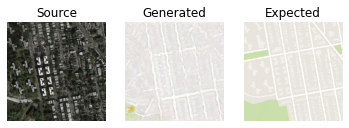

In [17]:
[X1, X2] = dataset
ix = randint(0, len(X1), 1)

src_image, tar_image = X1[ix], X2[ix]

gen_image = model.predict(src_image)

plot_images(src_image, gen_image, tar_image)


In [18]:
from keras.models import load_model
from numpy.random import randint

model1 = load_model('/content/model_001096.h5')

/usr/local/lib/python3.8/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


1/1 [==============================] - 1s 551ms/step


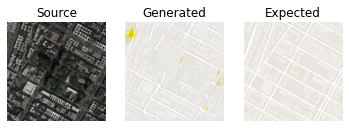

In [20]:
[X1, X2] = dataset
ix = randint(0, len(X1), 1)

src_image, tar_image = X1[ix], X2[ix]

gen_image = model1.predict(src_image)

plot_images(src_image, gen_image, tar_image)